<a href="https://colab.research.google.com/github/omidmno2/stockMarketPrediction_DL/blob/main/Khring_20x20_MAM_2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Getting Data from GitHub
!wget --no-check-certificate \
    https://github.com/omidmno2/stockMarketPrediction_DL/raw/main/tse_en.csv \
    -o /tmp/tse_en.csv

In [2]:
# Import required libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [3]:
# Select the desired symbol
df = pd.read_csv("tse_en.csv")
df[df.Symbol == "خرينگ"].head()

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
106,2008-12-07,خرينگ,رينگ‌سازي‌مشهد,871,845,845,871,0,845.0,845.0,1,1161,981045
4433,2009-02-01,خرينگ,رينگ‌سازي‌مشهد,871,845,845,861,-10,845.0,845.0,7,31464,26587080
5184,2009-02-09,خرينگ,رينگ‌سازي‌مشهد,861,836,836,860,-1,836.0,836.0,2,2000,1672000
5634,2009-02-17,خرينگ,رينگ‌سازي‌مشهد,860,835,835,860,0,835.0,835.0,1,100,83500
7046,2009-03-08,خرينگ,رينگ‌سازي‌مشهد,860,835,835,835,-25,835.0,835.0,1,25,20875


In [4]:
# Data cleaning
data = df[df.Symbol == "خرينگ"]
data.index = pd.to_datetime(data['Date'])
data = data.drop(columns=['Symbol', 'Name', 'Date']).dropna()
data = data.head(2300)

In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

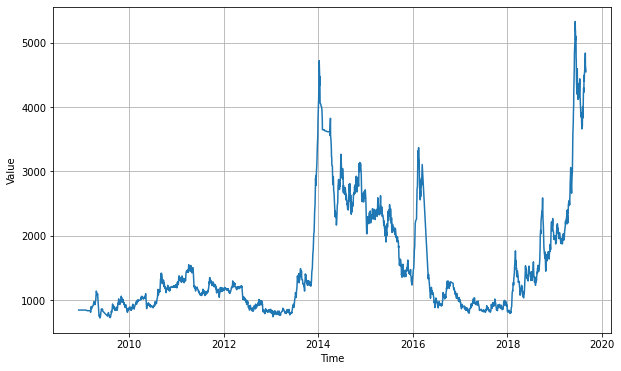

In [6]:
# Data plotting
series = np.array(data["Last"])
time = np.array(data.index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [7]:
data = data.Last

In [8]:
# 20 x 20 Moving Average Maping for whole data not include first 20days.

wins = []
for c in range(20, len(data)):
    row = []
    for d in range(1, 21):
        column = []
        for t in range(1, 21):
            MA = sum(data[c:c+abs(t-d)+1])/(abs(t-d)+1)
            column.append(MA)
        row.append(np.array(column))
    wins.append(np.array(row))

# فکر میکنم این چیزی که من بدست آوردم مشکلی داشته باشه اما متوجه نمیشم درستش چیه اما در کل بنظرم روش جالبی و نیست و احتمالا نتایج خوبی نداشته باشه

In [9]:
# Normalization 

for k in range(len(wins)):
    for i in range(len(wins[k])):
        for j in range(len(wins[k][i])):
            wins[k][i][j] = (wins[k][i][j] - np.array(wins[k]).min()) / (np.array(wins[k]).max() - np.array(wins[k]).min())

In [10]:
pd.DataFrame(np.array(wins[1500]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000,0.998535,0.995026,0.990833,0.985551,0.979266,0.972894
1,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000,0.998535,0.995026,0.990833,0.985551,0.979266
2,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000,0.998535,0.995026,0.990833,0.985551
3,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000,0.998535,0.995026,0.990833
4,0.897169,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000,0.998535,0.995026
5,0.916306,0.897169,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000,0.998535
6,0.933733,0.916306,0.897169,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848,1.000000
7,0.955170,0.933733,0.916306,0.897169,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341,0.997848
8,0.965072,0.955170,0.933733,0.916306,0.897169,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802,0.992341
9,0.972161,0.965072,0.955170,0.933733,0.916306,0.897169,0.880120,0.866689,0.847153,0.840493,0.847153,0.866689,0.880120,0.897169,0.916306,0.933733,0.955170,0.965072,0.972161,0.985802


In [11]:
def show_image_list(list_images, list_titles=None, cmap='rainbow', num_cols=8, figsize=(20, 20), title_fontsize=10):
    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

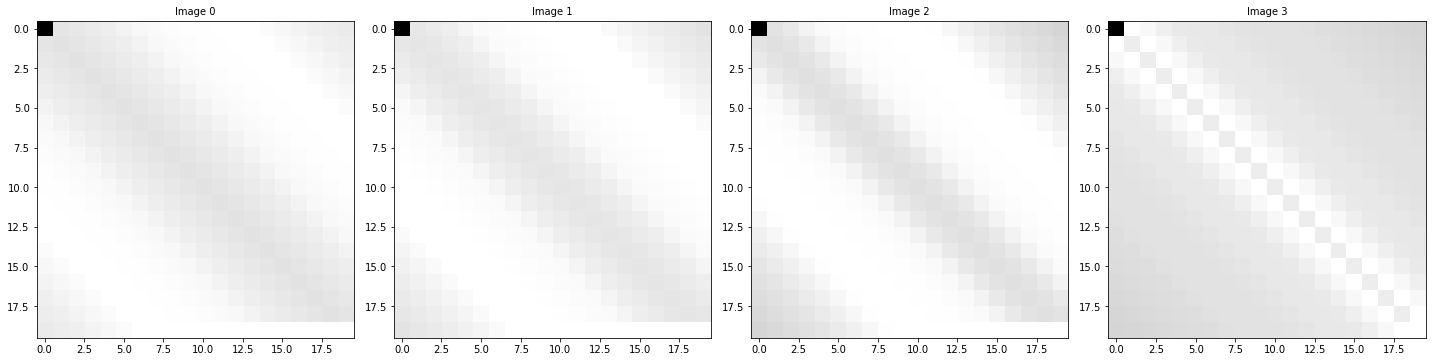

In [12]:
show_image_list([np.array(wins[0]), np.array(wins[1]), np.array(wins[2]), np.array(wins[300])], cmap='gray')

In [13]:
len(wins)

2280

In [14]:
len(data[20:])

2280

In [15]:
# Algorithm 1
# Labeling (Buy, Sell, Hold)

window_size = 11
counter = 0
bsh_labels = []

window_begin_idx=0
window_end_idx=0
window_middle_idx=0

min_idx=0
max_idx=0
number=0.0
mins=10000.0
maxs=0.0
while counter < len(data):
    if counter > window_size:
        window_begin_idx = counter - window_size
        window_end_idx = window_begin_idx + window_size - 1
        window_middle_idx = (window_begin_idx + window_end_idx)//2
        for i in range(window_begin_idx, window_end_idx+1):
            number = data[i]
            if number < mins:
                mins=number
                min_idx = np.where(data==mins)[0][0]
            if number > maxs:
                maxs=number
                max_idx = np.where(data==maxs)[0][0]
        if max_idx == window_middle_idx:
            bsh_labels.append(0) #SELL
        elif min_idx == window_middle_idx:
            bsh_labels.append(1) #BUY
        else:
            bsh_labels.append(2) #HOLD  
        mins = 10000.0
        maxs = 0.0
    counter+=1

In [16]:
len(bsh_labels)

2288

In [17]:
len(data)

2300

In [18]:
len(data) - len(bsh_labels)
# You should remove 6 rows from head and 6 rows from tail of data or actualy pictures.
# After checking, it was found that this difference is due to the fact that 6 lines from the top and 6 lines from the bottom have been removed.
# شش تای اول و شش تای آخر حذف میشوند موقع درست کردن لیبل

12

In [19]:
bsh_labels = bsh_labels[14:]
wins = wins[:-6]
print(len(bsh_labels))
print(len(wins))

2274
2274


In [20]:
wins = np.array(wins)
type(wins)

numpy.ndarray

In [21]:
wins[0].shape

(20, 20)

In [22]:
# Divide the data into training and validation data
split_time = 2000
y_train = bsh_labels[:split_time]
x_train = wins[:split_time]
y_valid = bsh_labels[split_time:]
x_valid = wins[split_time:]

y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_valid = tf.keras.utils.to_categorical(y_valid, 3)

In [23]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 6, 128)         0         
                                                        

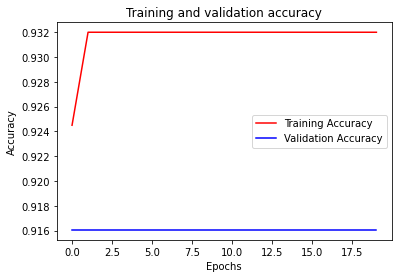

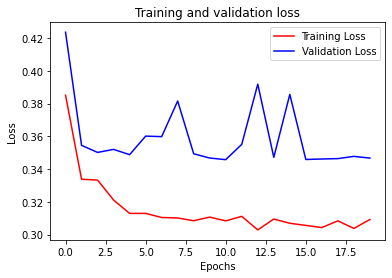

In [24]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [25]:
# Test Up and Down labeling method
data.head()

Date
2008-12-07    845
2009-02-01    845
2009-02-09    836
2009-02-17    835
2009-03-08    835
Name: Last, dtype: int64

In [26]:
# labeling Up or Down

ud_labels = []

for i in range(1, len(data)):
    if data[i] < data[i-1]:
        ud_labels.append(0) # 0 = Down
    else:
        ud_labels.append(1) # 1 = Up
        
# This method miss first row from data, you should remove first row then train it

ud_labels = ud_labels[19:-6]
len(ud_labels)

2274

In [27]:
len(wins)

2274

In [28]:
# Divide the data into training and validation data
split_time = 2000
y_train = ud_labels[:split_time]
x_train = wins[:split_time]
y_valid = ud_labels[split_time:]
x_valid = wins[split_time:]

y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

#y_train = tf.keras.utils.to_categorical(y_train, 2)
#y_valid = tf.keras.utils.to_categorical(y_valid, 2)

In [29]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 128)         0         
                                                      

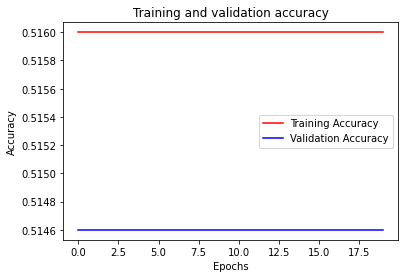

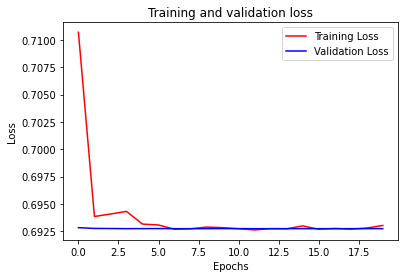

In [30]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()